In [ ]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy


In [ ]:
df = pd.read_csv("framingham.csv")

In [ ]:
#number of rows and columns
df.shape

(4240, 16)

In [ ]:
#names of variables
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#overview of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
#missing values
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
#summary statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#numerical variable summary
num_vars=['age','BMI','sysBP','diaBP','totChol','glucose','heartRate','cigsPerDay']
num_summary=df[num_vars].describe().T
num_summary

,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
BMI,4221.0,25.800801,4.079840,15.54,23.07,25.4,28.04,56.8
sysBP,4240.0,132.354599,22.033300,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.897759,11.910394,48.00,75.00,82.0,90.00,142.5
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0
glucose,3852.0,81.963655,23.954335,40.00,71.00,78.0,87.00,394.0
heartRate,4239.0,75.878981,12.025348,44.00,68.00,75.0,83.00,143.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0


In [ ]:
#count of each category (0=female, 1=male)
df['male'].value_counts()

,count
male,
0,2420
1,1820


In [ ]:
#percentage in each category (0=female, 1=male)
df['male'].value_counts(normalize=True)*100

,proportion
male,
0,57.075472
1,42.924528


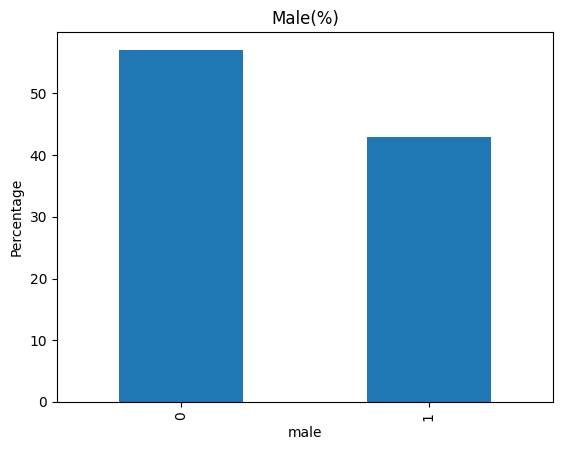

In [ ]:
#plot percentage of males vs females as a bar chart
(df['male'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Male(%)')
plt.show()

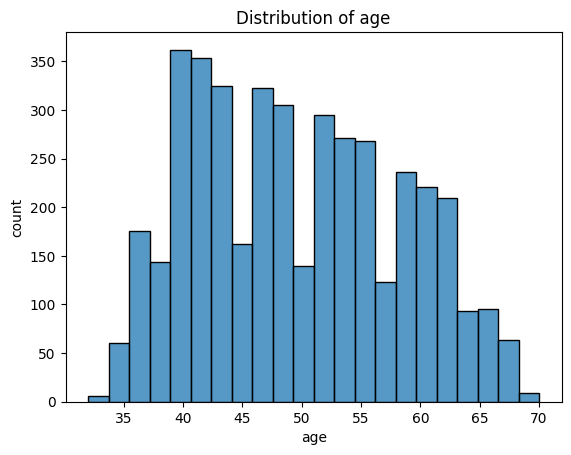

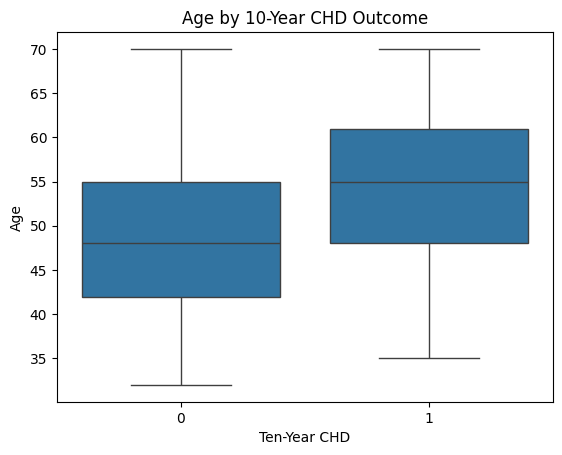

In [ ]:
#histogram to show distribution of age
sns.histplot(data=df, x='age')
plt.xlabel("age")
plt.ylabel("count")
plt.title("Distribution of age")

#boxplot to compare age distribution by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Age')
plt.show()


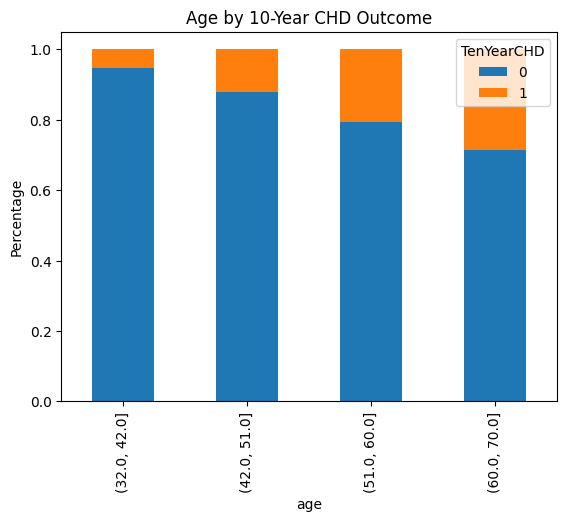

In [ ]:
#bin 'age' into 4 equal-width intervals and count
df['age_bin'] = pd.cut(df['age'], bins= 4, precision = 0)
df['age_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each age bin
pd.crosstab(df['age_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("age")
plt.ylabel("Percentage")
plt.title("Age by 10-Year CHD Outcome")
plt.show()

In [ ]:
#count in each education level
df['education'].value_counts()

,count
education,
1.0,1720
2.0,1253
3.0,689
4.0,473


In [ ]:
#percentage in each education level
df['education'].value_counts(normalize=True)*100

,proportion
education,
1.0,41.596131
2.0,30.302297
3.0,16.662636
4.0,11.438936


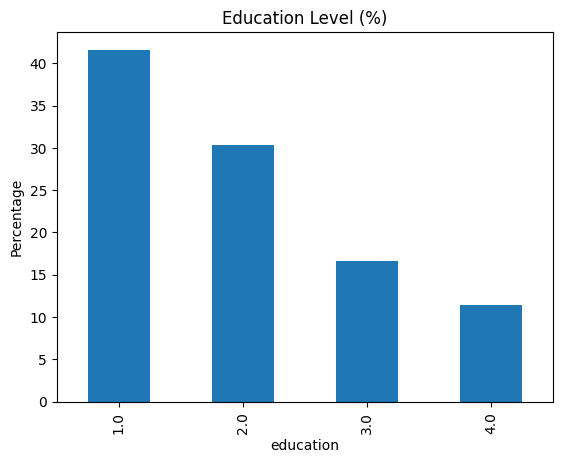

In [ ]:
#bar chart showing percentage of participants in each education level
(df['education'].value_counts(normalize=True)*100).plot(kind='bar',stacked=True)
plt.ylabel('Percentage')
plt.title('Education Level (%)')
plt.show()

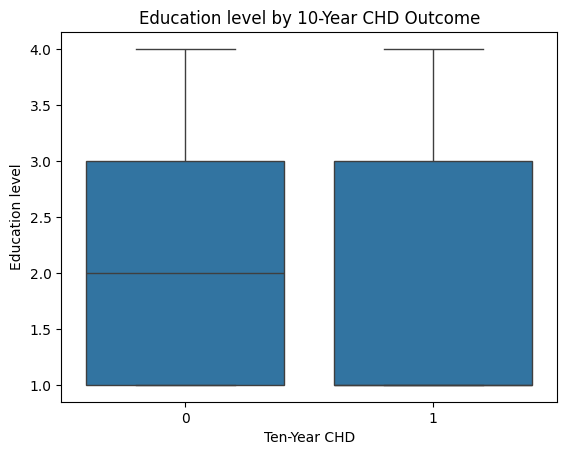

In [ ]:
#boxplot to compare education level distribution by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='education', data=df)
plt.title('Education level by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Education level')
plt.show()

In [ ]:
#count of current smokers vs non smokers
df['currentSmoker'].value_counts()

,count
currentSmoker,
0,2145
1,2095


In [ ]:
#percentage of smokers vs non smokers
df['currentSmoker'].value_counts(normalize=True)*100

,proportion
currentSmoker,
0,50.589623
1,49.410377


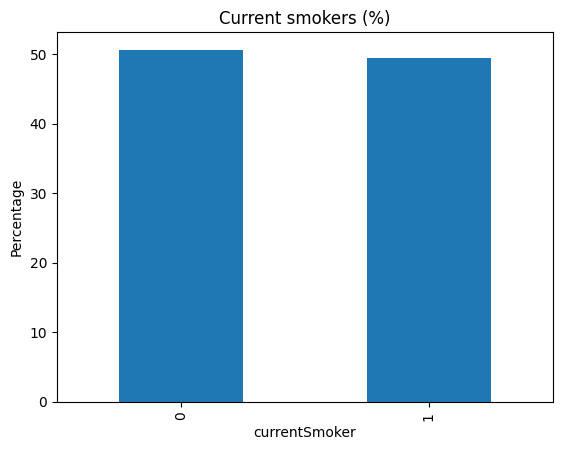

In [ ]:
#bar chart showing percentage of current smokers vs non-smokers
(df['currentSmoker'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Current smokers (%)')
plt.show()

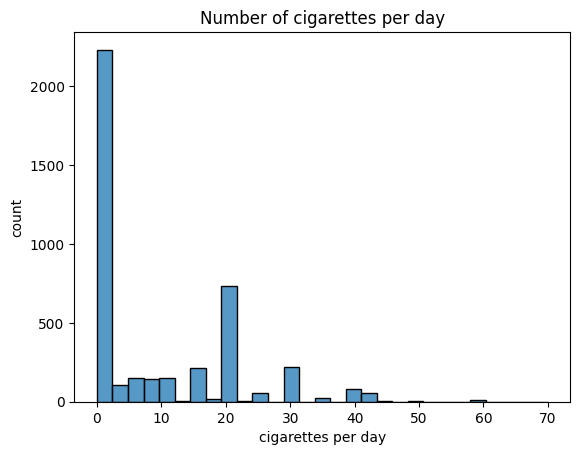

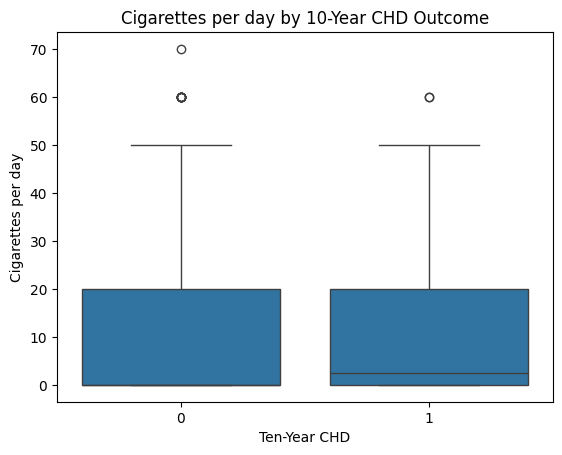

In [ ]:
#histogram to show distribution of cigarettes per day
sns.histplot(data=df, x='cigsPerDay')
plt.xlabel("cigarettes per day")
plt.ylabel("count")
plt.title("Number of cigarettes per day")

#boxplot to compare cigarettes per day by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df)
plt.title('Cigarettes per day by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Cigarettes per day')
plt.show()

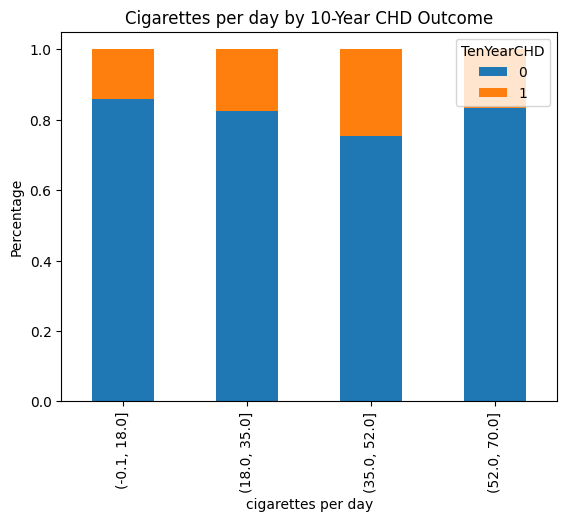

In [ ]:
#bin 'cigsPerDay' into 4 equal-width intervals and count
df['cigs_bin'] = pd.cut(df['cigsPerDay'], bins=4, precision = 0)
df['cigs_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each 'cigsPerDay' bin
pd.crosstab(df['cigs_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("cigarettes per day")
plt.ylabel("Percentage")
plt.title("Cigarettes per day by 10-Year CHD Outcome")
plt.show()

In [ ]:
#count of participants on blood pressure medication vs not
df['BPMeds'].value_counts()

,count
BPMeds,
0.0,4063
1.0,124


In [ ]:
#percentage of participants on blood pressure medication vs not
df['BPMeds'].value_counts(normalize=True)*100

,proportion
BPMeds,
0.0,97.038452
1.0,2.961548


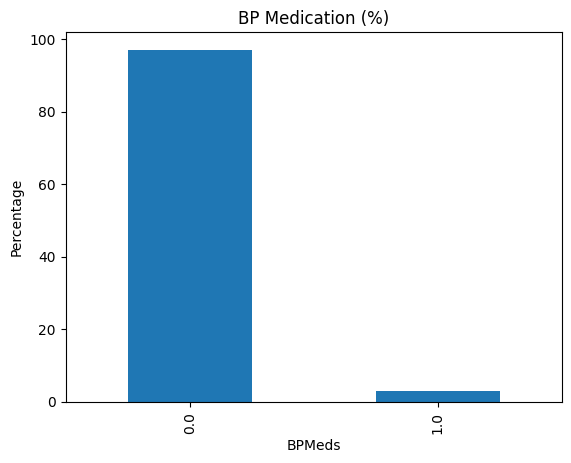

In [ ]:
#bar chart showing percentage of participants on blood pressure medication vs not
(df['BPMeds'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('BP Medication (%)')
plt.show()

In [ ]:
#count of participants with and without a history of stroke
df['prevalentStroke'].value_counts()

,count
prevalentStroke,
0,4215
1,25


In [ ]:
#percentage of participants with and without a history of stroke
df['prevalentStroke'].value_counts(normalize=True)*100

,proportion
prevalentStroke,
0,99.410377
1,0.589623


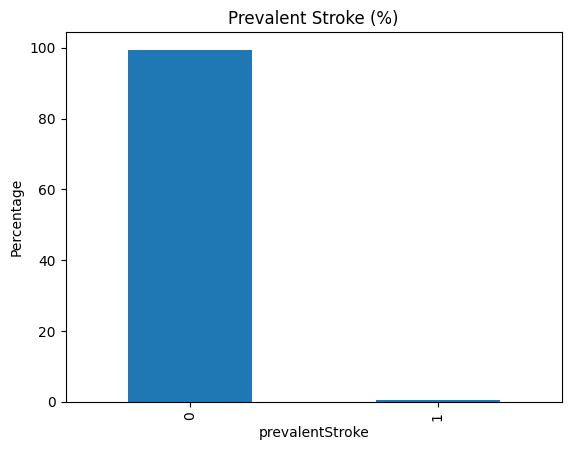

In [ ]:
#bar chart showing percentage of participants with and without a history of stroke
(df['prevalentStroke'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Prevalent Stroke (%)')
plt.show()

In [ ]:
#count of participants with and without prevalent hypertension
df['prevalentHyp'].value_counts()

,count
prevalentHyp,
0,2923
1,1317


In [ ]:
#percentage of participants with and without prevalent hypertension
df['prevalentHyp'].value_counts(normalize=True)*100

,proportion
prevalentHyp,
0,68.938679
1,31.061321


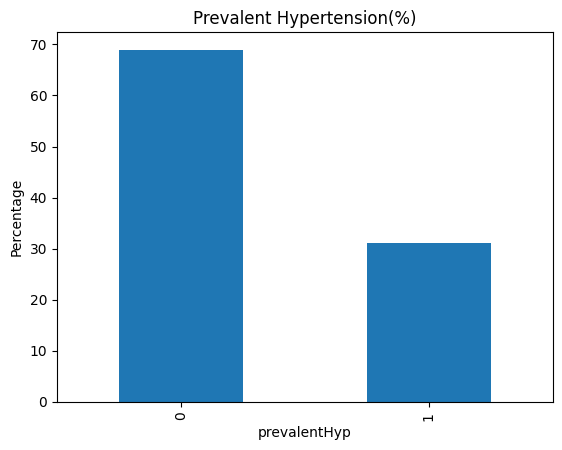

In [ ]:
#bar chart showing percentage of participants with and without prevalent hypertension
(df['prevalentHyp'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Prevalent Hypertension(%)')
plt.show()

In [ ]:
#count of participants with and without diabetes
df['diabetes'].value_counts()

,count
diabetes,
0,4131
1,109


In [ ]:
#percentage of participants with and without diabetes
df['diabetes'].value_counts(normalize=True)*100

,proportion
diabetes,
0,97.429245
1,2.570755


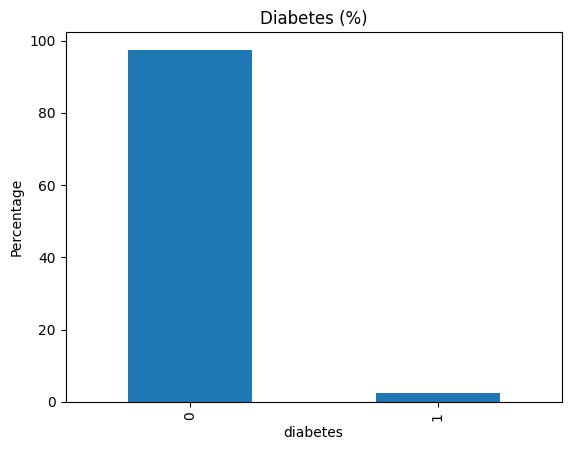

In [ ]:
#bar chart showing percentage of participants with and without diabetes
(df['diabetes'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Diabetes (%)')
plt.show()

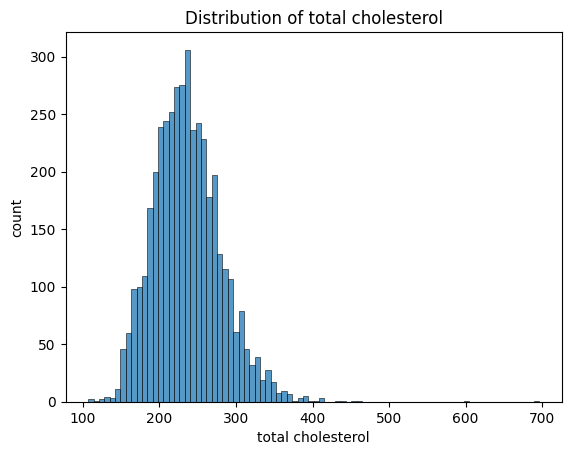

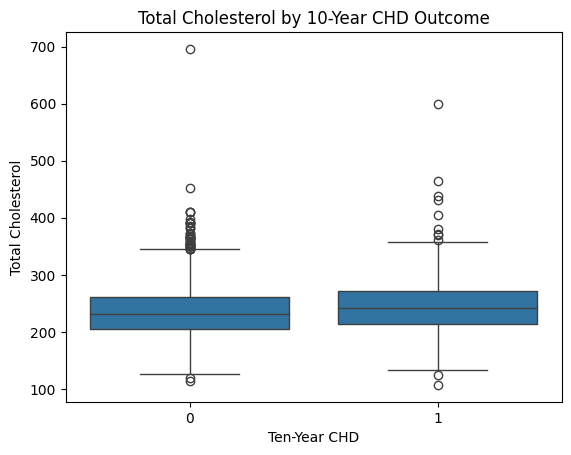

In [ ]:
#histogram showing the distribution of total cholesterol levels
sns.histplot(data=df, x='totChol')
plt.xlabel("total cholesterol")
plt.ylabel("count")
plt.title("Distribution of total cholesterol")

#boxplot comparing total cholesterol by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Total Cholesterol by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Total Cholesterol')
plt.show()

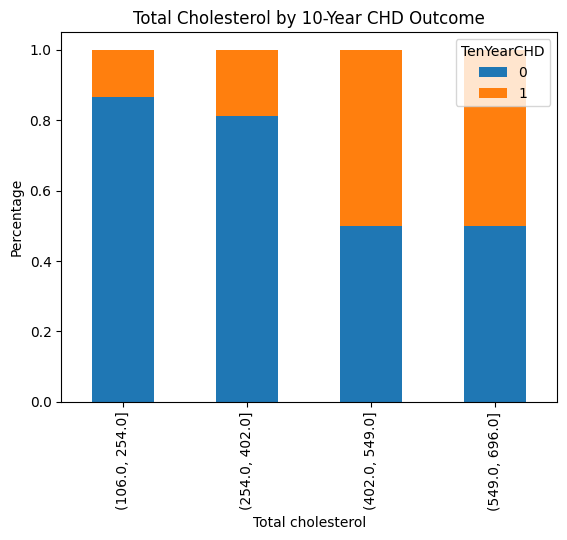

In [ ]:
#bin total cholesterol into 4 equal-width intervals and count observations in each bin
df['totChol_bin'] = pd.cut(df['totChol'], bins=4, precision = 0)
df['totChol_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each total cholesterol bin
pd.crosstab(df['totChol_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("Total cholesterol")
plt.ylabel("Percentage")
plt.title("Total Cholesterol by 10-Year CHD Outcome")
plt.show()

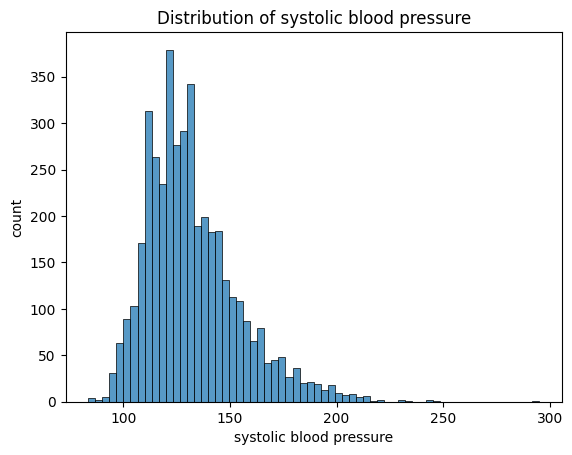

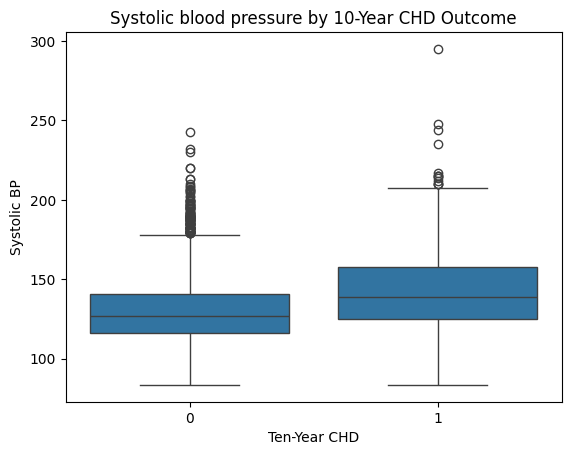

In [ ]:
#histogram showing the distribution of systolic blood pressure
sns.histplot(data=df, x='sysBP')
plt.xlabel("systolic blood pressure")
plt.ylabel("count")
plt.title("Distribution of systolic blood pressure")

#boxplot comparing systolic blood pressure by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Systolic blood pressure by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Systolic BP')
plt.show()

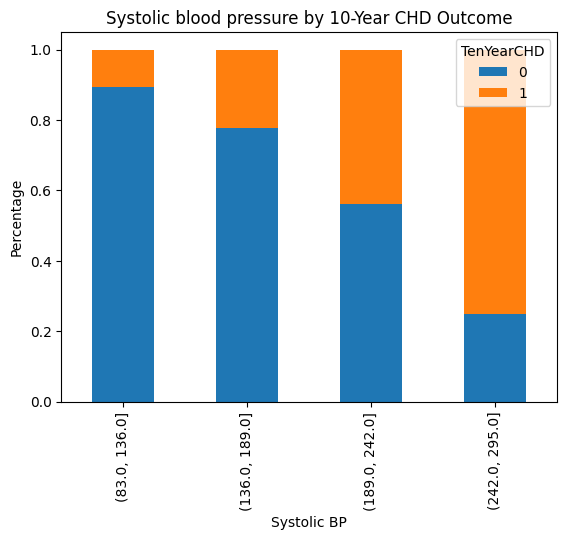

In [ ]:
#bin systolic blood pressure into 4 equal-width intervals and count observations in each bin
df['sysBP_bin'] = pd.cut(df['sysBP'], bins=4, precision = 0)
df['sysBP_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each systolic blood pressure bin
pd.crosstab(df['sysBP_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("Systolic BP")
plt.ylabel("Percentage")
plt.title("Systolic blood pressure by 10-Year CHD Outcome")
plt.show()

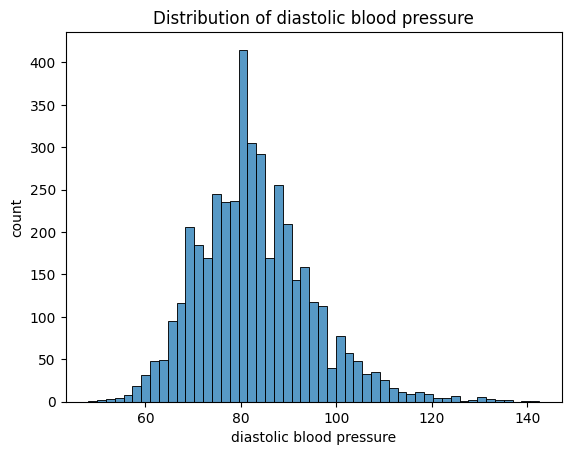

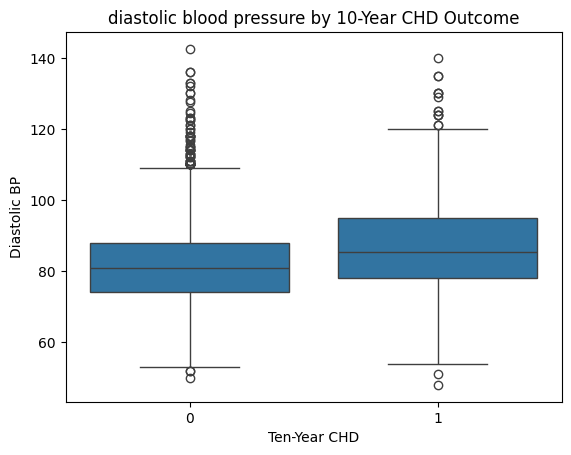

In [ ]:
#histogram showing the distribution of diastolic blood pressure
sns.histplot(data=df, x='diaBP')
plt.xlabel("diastolic blood pressure")
plt.ylabel("count")
plt.title("Distribution of diastolic blood pressure")

#boxplot comparing diastolic blood pressure by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('diastolic blood pressure by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Diastolic BP')
plt.show()

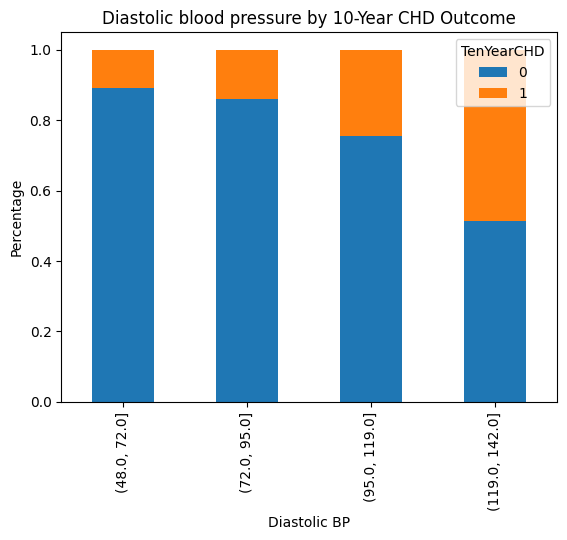

In [ ]:
#bin diastolic blood pressure into 4 equal-width intervals and count observations in each bin
df['diaBP_bin'] = pd.cut(df['diaBP'], bins=4, precision = 0)
df['diaBP_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each diastolic blood pressure bin
pd.crosstab(df['diaBP_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("Diastolic BP")
plt.ylabel("Percentage")
plt.title("Diastolic blood pressure by 10-Year CHD Outcome")
plt.show()

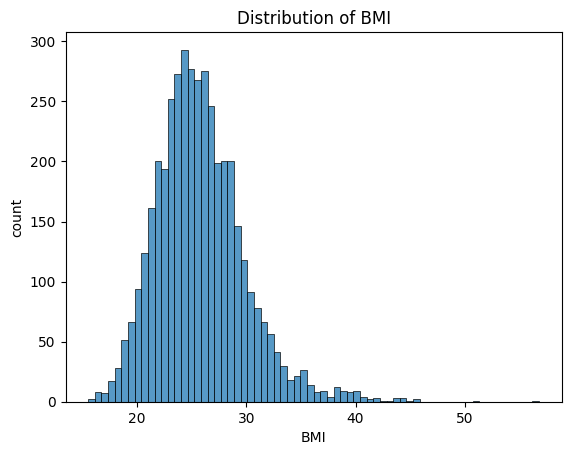

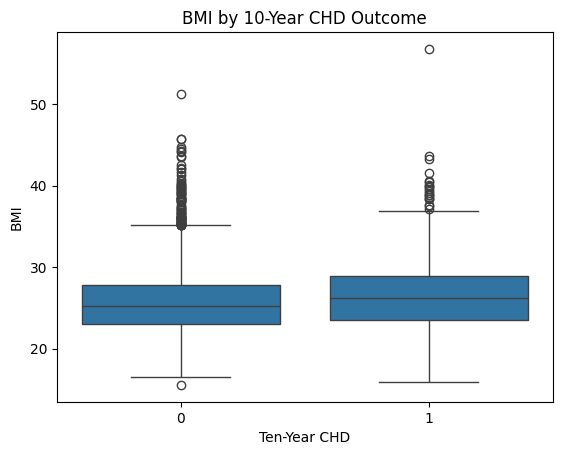

In [ ]:
#histogram showing the distribution of BMI
sns.histplot(data=df, x='BMI')
plt.xlabel("BMI")
plt.ylabel("count")
plt.title("Distribution of BMI")

#boxplot comparing BMI by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='BMI', data=df)
plt.title('BMI by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('BMI')
plt.show()

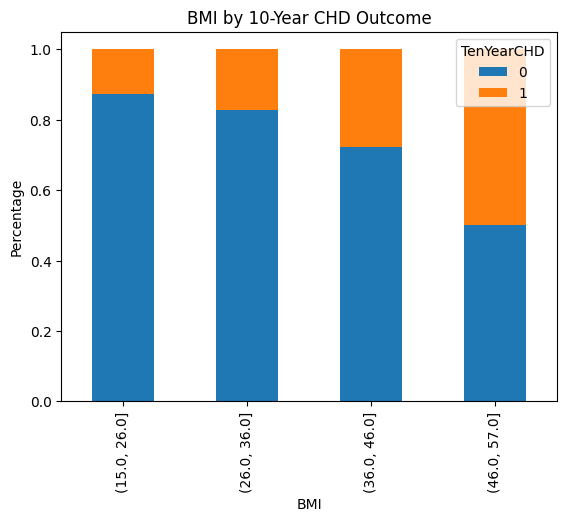

In [ ]:
#bin BMI into 4 equal-width intervals and count observations in each bin
df['BMI_bin'] = pd.cut(df['BMI'], bins=4, precision = 0)
df['BMI_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each BMI bin
pd.crosstab(df['BMI_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("BMI")
plt.ylabel("Percentage")
plt.title("BMI by 10-Year CHD Outcome")
plt.show()

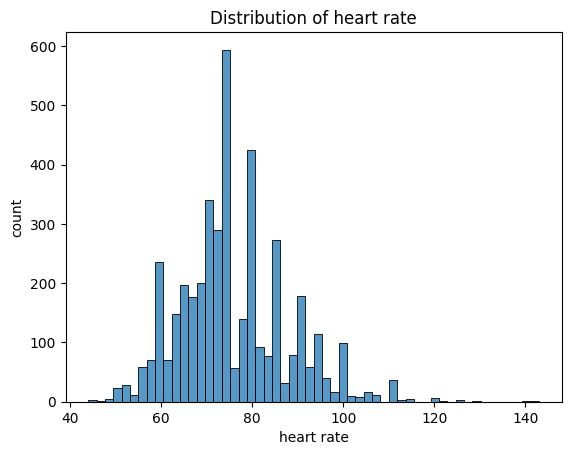

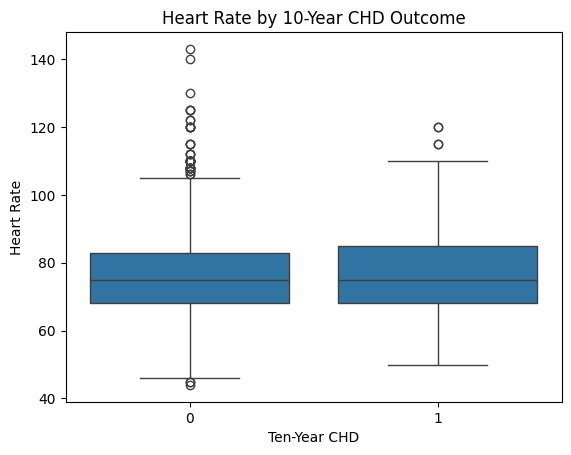

In [ ]:
#histogram showing the distribution of heart rate
sns.histplot(data=df, x='heartRate')
plt.xlabel("heart rate")
plt.ylabel("count")
plt.title("Distribution of heart rate")

#boxplot comparing heart rate by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Heart Rate')
plt.show()

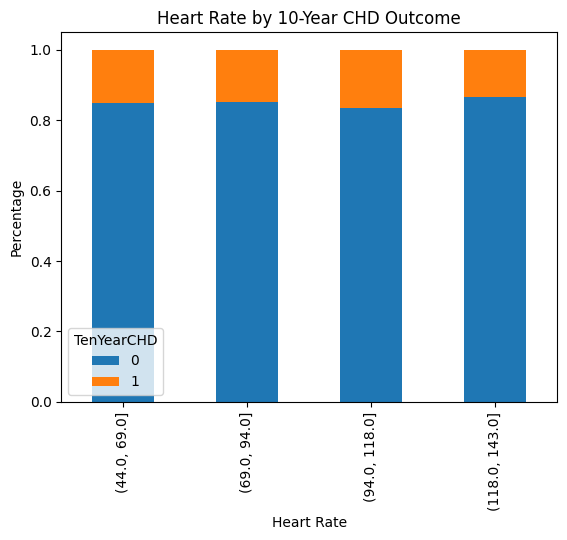

In [ ]:
#bin heart rate into 4 equal-width intervals and count observations in each bin
df['heartRate_bin'] = pd.cut(df['heartRate'], bins=4, precision = 0)
df['heartRate_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each heart rate bin
pd.crosstab(df['heartRate_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("Heart Rate")
plt.ylabel("Percentage")
plt.title("Heart Rate by 10-Year CHD Outcome")
plt.show()

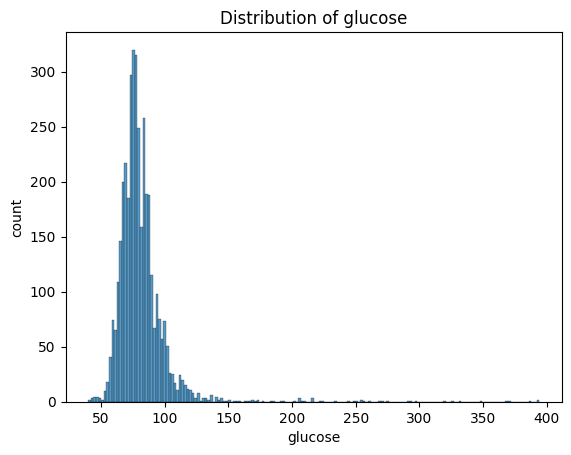

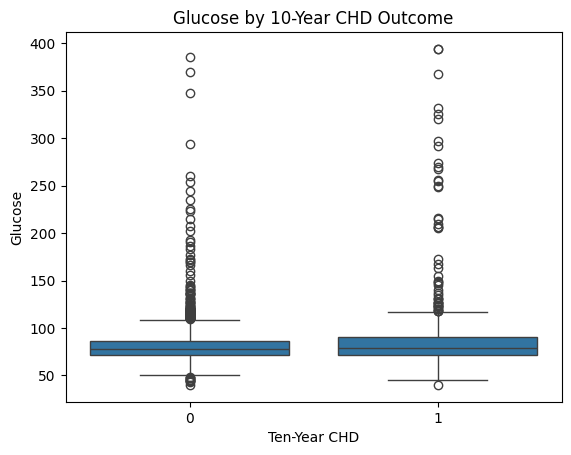

In [ ]:
#histogram showing the distribution of glucose
sns.histplot(data=df, x='glucose')
plt.xlabel("glucose")
plt.ylabel("count")
plt.title("Distribution of glucose")

#boxplot comparing glucose level by 10-year CHD outcome
plt.figure()
sns.boxplot(x='TenYearCHD', y='glucose', data=df)
plt.title('Glucose by 10-Year CHD Outcome')
plt.xlabel('Ten-Year CHD')
plt.ylabel('Glucose')
plt.show()

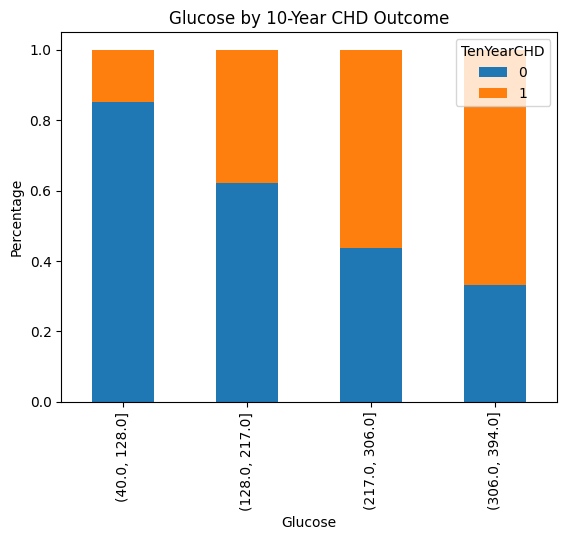

In [ ]:
#bin glucose into 4 equal-width intervals and count observations in each bin
df['gluc_bin'] = pd.cut(df['glucose'], bins=4, precision = 0)
df['gluc_bin'].value_counts()

#stacked bar chart showing proportion of 10-year CHD outcome within each glucose bin
pd.crosstab(df['gluc_bin'], df['TenYearCHD'],normalize='index').plot(kind='bar', stacked=True)
plt.xlabel("Glucose")
plt.ylabel("Percentage")
plt.title("Glucose by 10-Year CHD Outcome")
plt.show()

In [ ]:
#count of participants with and without 10-year CHD outcome
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


In [ ]:
#percentage of participants with and without 10-year CHD outcome
df['TenYearCHD'].value_counts(normalize=True)*100

,proportion
TenYearCHD,
0,84.811321
1,15.188679


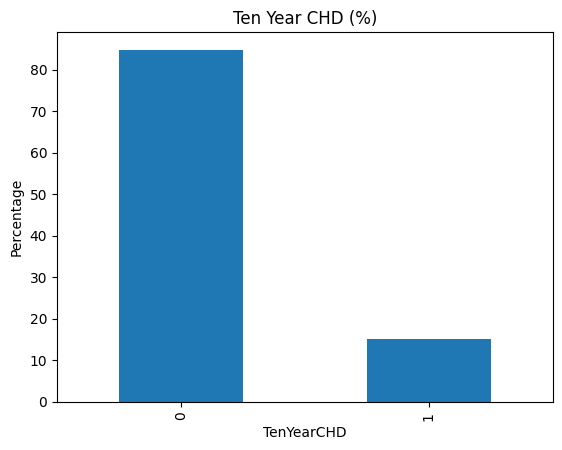

In [ ]:
#bar chart showing percentage of participants with and without 10-year CHD
(df['TenYearCHD'].value_counts(normalize=True)*100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Ten Year CHD (%)')
plt.show()

In [ ]:
#overall 10-year CHD incidence rate (%)
chd_incidence=df['TenYearCHD'].mean()*100
chd_incidence

np.float64(15.188679245283017)

In [ ]:
#mean of numeric variables grouped by 10-year CHD outcome
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
mean_summary=df.groupby('TenYearCHD')[num_cols].mean().T
mean_summary

TenYearCHD,0,1
age,48.762514,54.145963
cigsPerDay,8.713925,10.629283
totChol,235.147398,245.388976
sysBP,130.337319,143.618789
diaBP,82.166435,86.981366
BMI,25.671659,26.531451
heartRate,75.762514,76.530327
glucose,80.679251,89.008418


In [ ]:
#median of numeric variables grouped by 10-year CHD outcome
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
median_summary=df.groupby('TenYearCHD')[num_cols].median().T
median_summary

TenYearCHD,0,1
age,48.00,55.000
cigsPerDay,0.00,2.500
totChol,232.00,241.000
sysBP,127.00,139.000
diaBP,81.00,85.500
BMI,25.25,26.155
heartRate,75.00,75.000
glucose,78.00,79.000


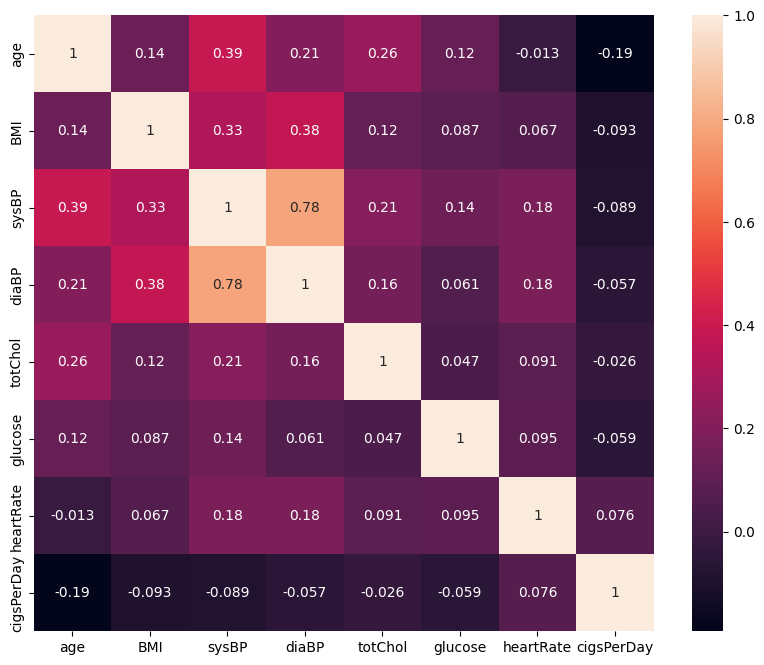

In [ ]:
#compute correlation matrix for numeric variables and visualize it using a heatmap
num_vars = ['age','BMI','sysBP','diaBP','totChol','glucose','heartRate','cigsPerDay']
corr_matrix = df[num_vars].corr()
corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#split the dataset into two groups based on TenYearCHD
df_CHD0 = df[df['TenYearCHD'] == 0]
df_CHD1 = df[df['TenYearCHD'] == 1]

In [ ]:
#calculate number of missing values per column for CHD=0 and CHD=1
missing_count_CHD0 = df_CHD0.isnull().sum()
missing_count_CHD1 = df_CHD1.isnull().sum()

#create summary table
missing_table_counts = pd.DataFrame({
    'Missing (CHD=0)': missing_count_CHD0,
    'Missing (CHD=1)': missing_count_CHD1
})
missing_table_counts


,Missing (CHD=0),Missing (CHD=1)
male,0,0
age,0,0
education,89,16
currentSmoker,0,0
cigsPerDay,27,2
BPMeds,42,11
prevalentStroke,0,0
prevalentHyp,0,0
diabetes,0,0
totChol,41,9


In [ ]:
#percentage of missing values in each column for CHD = 0 group
missing_CHD0 = df_CHD0.isnull().sum() / len(df_CHD0)*100

In [ ]:
#percentage of missing values in each column for CHD = 1 group
missing_CHD1 = df_CHD1.isnull().sum() / len(df_CHD1)*100

In [ ]:
#percentage of missing values in the whole dataset relative to the size of CHD = 1 group
missing_relative_CHD1 = df.isnull().sum() / len(df_CHD1)*100

In [ ]:
#summary table of missing value percentages for CHD=0, CHD=1, and relative to CHD=1 group
missing_table = pd.DataFrame({
    'Missing % (CHD=0)': missing_CHD0,
    'Missing % (CHD=1)': missing_CHD1,
    'Missing % wrt CHD=1': missing_relative_CHD1
})
missing_table

,Missing % (CHD=0),Missing % (CHD=1),Missing % wrt CHD=1
male,0.000000,0.000000,0.000000
age,0.000000,0.000000,0.000000
education,2.474972,2.484472,16.304348
currentSmoker,0.000000,0.000000,0.000000
cigsPerDay,0.750834,0.310559,4.503106
BPMeds,1.167964,1.708075,8.229814
prevalentStroke,0.000000,0.000000,0.000000
prevalentHyp,0.000000,0.000000,0.000000
diabetes,0.000000,0.000000,0.000000
totChol,1.140156,1.397516,7.763975


In [ ]:
#split dataset into features(x) and target(y)
y = df['TenYearCHD']
x = df.drop(['TenYearCHD'], axis=1)

In [ ]:
# Drop EDA-only binned columns before modelling
bin_cols = [c for c in x.columns if c.endswith('_bin') or c.lower().endswith('bin')]
x = x.drop(columns=bin_cols, errors='ignore')

In [ ]:
#split data into training and testing sets (80/20) with stratification to maintain class balance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#identify numerical and categorical columns in the dataset
cat_cols = ['male','currentSmoker','BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_cols = [c for c in x.columns if c not in cat_cols]

In [ ]:
#import
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# impute numericals
num_imputer = SimpleImputer(strategy='median')
x_train[num_cols] = num_imputer.fit_transform(x_train[num_cols])
x_test[num_cols]  = num_imputer.transform(x_test[num_cols])

# impute categoricals
cat_imputer = SimpleImputer(strategy='most_frequent')
x_train[cat_cols] = cat_imputer.fit_transform(x_train[cat_cols])
x_test[cat_cols]  = cat_imputer.transform(x_test[cat_cols])

# scale numericals only
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols]  = scaler.transform(x_test[num_cols])

In [ ]:
#train a logistic regression model with increased iterations and balanced class weights
#binned variables were only used for EDA. Continuous variables were retained for logistic regression modelling.
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression( max_iter=5000, class_weight='balanced')
log_model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [ ]:
#predict probabilities for both classes
y_test_proba = log_model.predict_proba(x_test)

#predict probability of CHD (class = 1)
y_test_prob_CHD = y_test_proba[:, 1]

In [ ]:
#threshold = 0.5
y_test_pred = (y_test_prob_CHD > 0.5).astype(int)

In [ ]:
#import evaluation metric functions
from sklearn.metrics import(roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score)

In [ ]:
#ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_prob_CHD)
print("ROC-AUC:", roc_auc)

#precision
precision = precision_score(y_test, y_test_pred)
print("Precision:", precision)

#recall
recall = recall_score(y_test, y_test_pred)
print("Recall:", recall)

#f1-score
f1=f1_score(y_test, y_test_pred)
print("F1-score:", f1)

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion matrix:\n", cm)

#accuracy
accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


ROC-AUC: 0.7007579433105843
Precision: 0.25245901639344265
Recall: 0.5968992248062015
F1-score: 0.3548387096774194
Confusion matrix:
 [[491 228]
 [ 52  77]]
Accuracy: 0.6698113207547169


In [ ]:
#calculate precision-recall values and avg. precision for CHD prediction
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob_CHD)
average_precision = average_precision_score(y_test, y_test_prob_CHD)

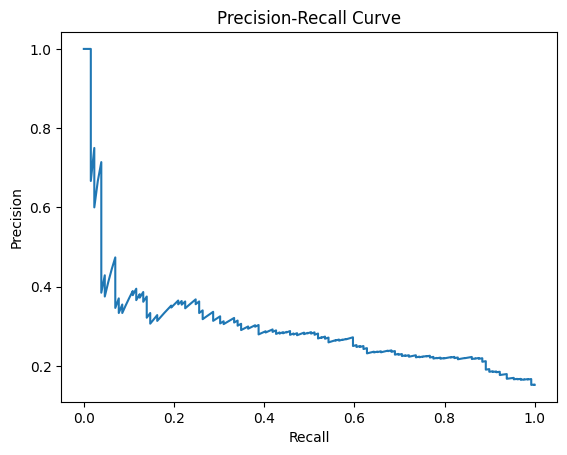

average precision: 0.2982491727285222
baseline prevalence:


(None, np.float64(0.15212264150943397))

In [ ]:
#plot precision-recall curve and print average precision and baseline prevalence
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print("average precision:", average_precision)
print("baseline prevalence:"),y_test.mean()

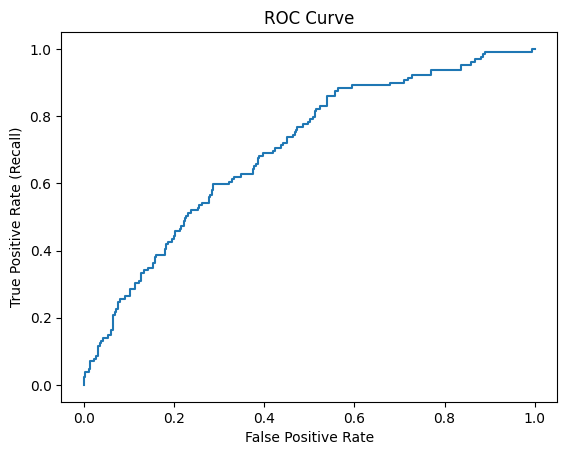

In [ ]:
#compute ROC curve and AUC:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob = log_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score=roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [ ]:
#different thresholds
thresholds=[0.4,0.6]

for thresh in thresholds:

    #convert probabilities into 0/1 predictions using the threshold
    y_pred_thresh = (y_test_prob_CHD >= thresh).astype(int)
    print("Threshold:",thresh)

    #precision: how many are actuslly CHD
    precision = precision_score(y_test, y_pred_thresh)
    print("Precision:", precision)

    #recall: how many actual CHD cases we successfully caught
    recall = recall_score(y_test, y_pred_thresh)
    print("Recall:", recall)

    #accuracy: how many total predictions were correct
    accuracy = accuracy_score(y_test, y_pred_thresh)
    print("Accuracy:", accuracy)

    #ROC-AUC: how well the model separates CHD vs non-CHD
    roc_auc = roc_auc_score(y_test, y_test_prob_CHD)
    print("ROC-AUC:",roc_auc)

Threshold: 0.4
Precision: 0.2255125284738041
Recall: 0.7674418604651163
Accuracy: 0.5636792452830188
ROC-AUC: 0.7007579433105843
Threshold: 0.6
Precision: 0.28350515463917525
Recall: 0.4263565891472868
Accuracy: 0.7488207547169812
ROC-AUC: 0.7007579433105843


In [ ]:
#get feature names
feature_name = x_train.columns

#get model coefficients
coefficients = log_model.coef_[0]

#create table
coef_table = pd.DataFrame({'Feature': feature_name, 'Coefficient': coefficients})

#sort
coef_table = coef_table.sort_values(by='Coefficient', ascending=False)
coef_table

,Feature,Coefficient
6,prevalentStroke,0.916561
1,age,0.614162
5,BPMeds,0.519999
0,male,0.398581
8,diabetes,0.343777
10,sysBP,0.256384
4,cigsPerDay,0.255309
7,prevalentHyp,0.149876
14,glucose,0.121103
9,totChol,0.109355


In [ ]:
#convert coef to odds ratio
coef_table['Odds Ratio'] = np.exp(coef_table['Coefficient'])
coef_table

,Feature,Coefficient,Odds Ratio
6,prevalentStroke,0.916561,2.500675
1,age,0.614162,1.848107
5,BPMeds,0.519999,1.682026
0,male,0.398581,1.489710
8,diabetes,0.343777,1.410263
10,sysBP,0.256384,1.292249
4,cigsPerDay,0.255309,1.290860
7,prevalentHyp,0.149876,1.161690
14,glucose,0.121103,1.128741
9,totChol,0.109355,1.115558


In [ ]:
#5-fold cross validation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

cat_cols = ['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
num_cols = [c for c in x.columns if c not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
    ],
    remainder='drop'
)

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000, class_weight='balanced'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(pipe, x, y, cv=cv, scoring='roc_auc')
print("Mean CV AUC:", cv_auc.mean())
print("Std CV AUC:", cv_auc.std())


Mean CV AUC: 0.7224173493440548
Std CV AUC: 0.026415685038899857
